# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from scipy.stats import itemfreq
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
data = pd.read_csv('text_emotion.csv')

In [3]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
data.shape

(40000, 4)

In [5]:
data.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

# EDA

## Preprocessing And Data Visualization

In [8]:
new_data = data.rename(columns = {"sentiment": "Emotion"})
new_data

,tweet_id,Emotion,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [9]:
new_data['Emotion'].value_counts()new_data1.Emotion = np.where((new_data1.Emotion == 'neutral') |(new_data1.Emotion == 'empty')|(new_data1.Emotion == 'boredom'),'neutral',new_data1.Emotion)


neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64

<AxesSubplot:>

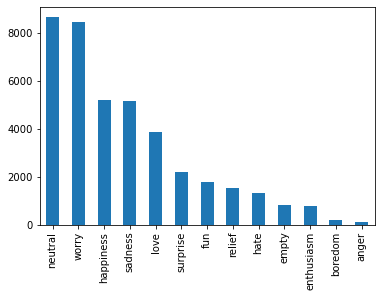

In [10]:
new_data['Emotion'].value_counts().plot(kind='bar')

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


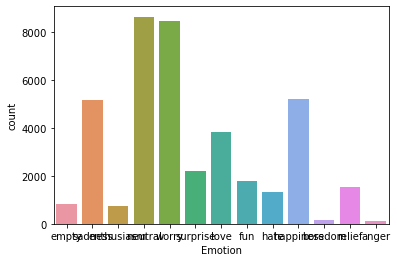

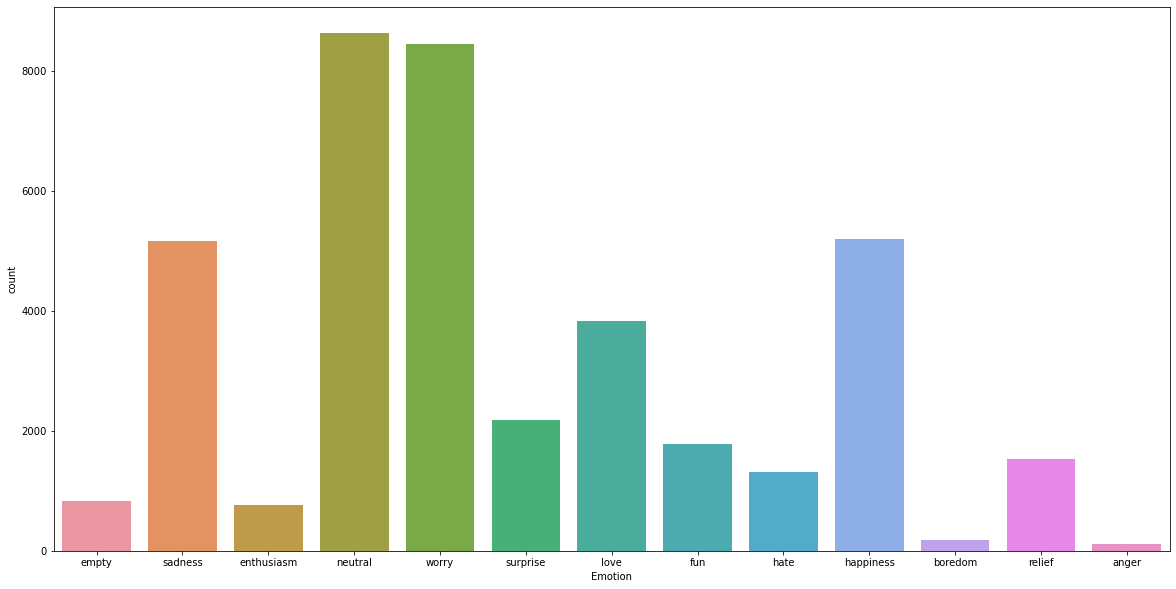

In [11]:
sns.countplot(new_data['Emotion']) #old 
plt.figure(figsize=(20,10)) #new 
sns.countplot(x='Emotion', data=new_data)
plt.show()

In [12]:
new_data1=new_data[['tweet_id','Emotion','content']].copy()

In [13]:
new_data1.Emotion = np.where((new_data1.Emotion == 'neutral') |(new_data1.Emotion == 'empty')|(new_data1.Emotion == 'boredom'),'neutral',new_data1.Emotion)

In [14]:
new_data1.Emotion= np.where((new_data1.Emotion == 'fun') |(new_data1.Emotion == 'enthusiasm'),'fun',new_data1.Emotion)

In [15]:
new_data1=new_data1[new_data1.Emotion !='neutral']

In [16]:
new_data1.Emotion.value_counts()

worry        8459
happiness    5209
sadness      5165
love         3842
fun          2535
surprise     2187
relief       1526
hate         1323
anger         110
Name: Emotion, dtype: int64

In [17]:
data2=pd.read_csv('tweets_clean.txt',sep='	',header=None)

In [18]:
data2.head(20)

,0,1,2
0,145353048817012736:,Thinks that @melbahughes had a great 50th birt...,:: surprise
1,144279638024257536:,"Como una expresión tan simple, una sola oració...",:: sadness
2,140499585285111809:,the moment when you get another follower and y...,:: joy
3,145207578270507009:,Be the greatest dancer of your life! practice ...,:: joy
4,139502146390470656:,eww.. my moms starting to make her annual rum ...,:: disgust
5,146042696899887106:,If ur heart hurts all the time for tht person ...,:: joy
6,145492569609084928:,"I feel awful, and it's way too freaking early....",:: joy
7,145903955229151232:,So chuffed for safc fans! Bet me dar comes in ...,:: joy
8,142717613234069504:,Making art and viewing art are different at th...,:: fear
9,144183822873927680:,"Soooo dooowwwn!! Move on, get some sleep... Me...",:: anger


In [19]:
data2.columns=['tweet_id','content','sentiment']

In [20]:
data2.sentiment = data2.sentiment.str.replace(':: ','')

In [21]:
new_data2 = data2.rename(columns = {"sentiment": "Emotion"})
new_data2 

,tweet_id,content,Emotion
0,145353048817012736:,Thinks that @melbahughes had a great 50th birt...,surprise
1,144279638024257536:,"Como una expresión tan simple, una sola oració...",sadness
2,140499585285111809:,the moment when you get another follower and y...,joy
3,145207578270507009:,Be the greatest dancer of your life! practice ...,joy
4,139502146390470656:,eww.. my moms starting to make her annual rum ...,disgust
...,...,...,...
21046,146254676558495745:,@TheBodyShopUK Knowing my dissertation will be...,joy
21047,141661025014521856:,"hospital tomorrow morning, strapped with wires...",joy
21048,143061444525686784:,"Work is soooo slow, ready to have a great satu...",joy
21049,143068383678697472:,You realize that by choosing joy every single ...,joy


In [22]:
new_data2.Emotion.value_counts()

joy         8240
surprise    3849
sadness     3830
fear        2816
anger       1555
disgust      761
Name: Emotion, dtype: int64

In [23]:
data = new_data1.append(new_data2)
data.head(10)

,tweet_id,Emotion,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,fun,wants to hang out with friends SOON!
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?
11,1956969531,worry,Choked on her retainers
12,1956970047,sadness,Ugh! I have to beat this stupid song to get to...


In [24]:
data.Emotion = np.where((data.Emotion == 'disgust') | (data.Emotion == 'hate'),'hate',data.Emotion)

In [25]:
data.Emotion.value_counts()

sadness      8995
worry        8459
joy          8240
surprise     6036
happiness    5209
love         3842
fear         2816
fun          2535
hate         2084
anger        1665
relief       1526
Name: Emotion, dtype: int64

In [26]:
def Clean_text(data):
    tweets = []
    sentiments = []
    for index,row in data.iterrows():
        sentence = re.sub(pattern,'',row.text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        tweets.append(words)
        sentiments.append(row.sentiment)
    return tweets,sentiments

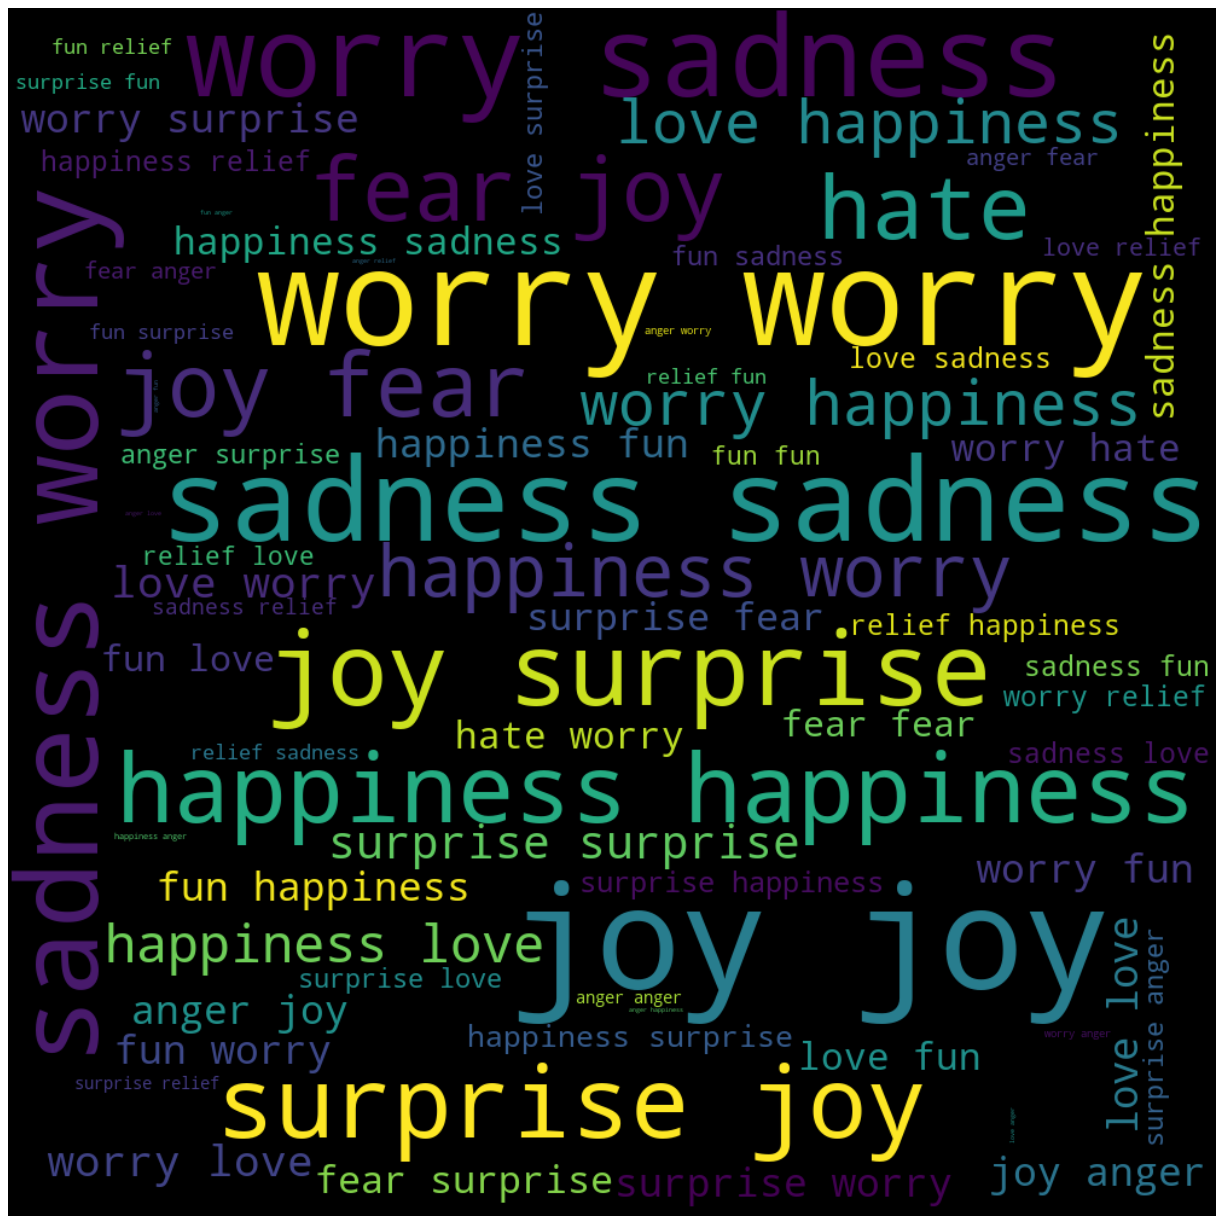

In [27]:
from wordcloud import WordCloud
allwords = " ".join([twts for twts in data["Emotion"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Clean Text

In [28]:
data=data[data.Emotion.isin(['sadness','worry','joy'])]

In [29]:
data.Emotion.value_counts()

sadness    8995
worry      8459
joy        8240
Name: Emotion, dtype: int64

## Remove Irrelevant Characters other than Alphanumeric and Space

In [30]:
data['content']=data['content'].str.replace('[^A-Za-z0-9\s]+', '')

<ipython-input-30-8e58614b0d91>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content']=data['content'].str.replace('[^A-Za-z0-9\s]+', '')


## Remove Links from the Text

In [31]:
data['content']=data['content'].str.replace('http\S+|www.\S+', '', case=False)

<ipython-input-31-a260812f61fd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content']=data['content'].str.replace('http\S+|www.\S+', '', case=False)


## Converting everything in Lowercase

In [32]:
data['content']=data['content'].str.lower()

In [33]:
data['content']

1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
5        repinging ghostridah14 why didnt you go to pro...
6        i should be sleep but im not thinking about an...
7                                            hmmm  is down
                               ...                        
21045    about to have a movie night with my booboo jel...
21046    thebodyshopuk knowing my dissertation will be ...
21047    hospital tomorrow morning strapped with wires ...
21048    work is soooo slow ready to have a great satur...
21049    you realize that by choosing joy every single ...
Name: content, Length: 25694, dtype: object

## Assign Target Variable

In [34]:
target=data.Emotion
data = data.drop(['Emotion'],axis=1)

In [35]:
data

,tweet_id,content
1,1956967666,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,funeral ceremonygloomy friday
5,1956968477,repinging ghostridah14 why didnt you go to pro...
6,1956968487,i should be sleep but im not thinking about an...
7,1956968636,hmmm is down
...,...,...
21045,141307495925821442:,about to have a movie night with my booboo jel...
21046,146254676558495745:,thebodyshopuk knowing my dissertation will be ...
21047,141661025014521856:,hospital tomorrow morning strapped with wires ...
21048,143061444525686784:,work is soooo slow ready to have a great satur...


In [36]:
le=LabelEncoder()

In [37]:
target=le.fit_transform(target)

In [38]:
target

array([1, 1, 2, ..., 0, 0, 0])

## Train Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data,target,stratify=target,test_size=0.4, random_state=42)

In [40]:
np.unique(y_train,return_index=True)

(array([0, 1, 2]), array([1, 3, 0], dtype=int64))

In [41]:
np.unique(y_test, return_index=True)

(array([0, 1, 2]), array([4, 0, 1], dtype=int64))

## Tokenization

### Note:-Tokenization can be done in a variety of ways, namely Bag of words, tf-idf, Glove, word2vec ,fasttext etc. Lets see how they can be applied and how they affect the accuracy

## Bag of Words

In [42]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.content)
X_test_counts =count_vect.transform(X_test.content)
print('Shape of Term Frequency Matrix: ',X_train_counts.shape)

Shape of Term Frequency Matrix:  (15416, 25747)


## Naive Bayes Model

In [43]:
clf = MultinomialNB().fit(X_train_counts,y_train)
predicted = clf.predict(X_test_counts)
nb_clf_accuracy = np.mean(predicted == y_test) * 100
print(nb_clf_accuracy)

59.26250243237984


## Pipeline

In [44]:
def print_acc(model):
    predicted = model.predict(X_test.content)
    accuracy = np.mean(predicted == y_test) * 100
    print(accuracy)

In [45]:
nb_clf = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
print_acc(nb_clf)

59.26250243237984


## TF-IDF Transformer

In [46]:
nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
print_acc(nb_clf)

58.54251799961082


In [47]:
confusion_matrix(y_test,predicted)

array([[2430,  517,  349],
       [ 551, 1989, 1058],
       [ 434, 1278, 1672]], dtype=int64)

## Remove The Stop Words

In [48]:
stop_words = set(stopwords.words('english'))
nb_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
print_acc(nb_clf)

58.23117338003503


In [49]:
nb_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
print_acc(nb_clf)

57.60848414088344


## Lemmatization

In [50]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [51]:
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [52]:
X_train.loc[:,'content'] = X_train['content'].apply(lemmatize_text)

C:\Users\sony\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [53]:
X_test.loc[:,'content'] = X_test['content'].apply(lemmatize_text)

In [54]:
nb_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
nb_clf = nb_clf.fit(X_train.content,y_train)
print_acc(nb_clf)

57.41389375364857
